### File Extraction from .tar

In [13]:
import tarfile
import os

# Path to the .tar.gz file
#Rotterdam_test_tar_gz = "data/spacenet_data/SN6_buildings_AOI_11_Rotterdam_test_public.tar.gz"
Rotterdam_train_tar_gz = "Z:/BuildingDetection/spacenet_data/SN6_buildings_AOI_11_Rotterdam_train.tar.gz"

# Directory to extract the files
#Rotterdam_test_output_dir = "data/spacenet_data/SN6_buildings_AOI_11_Rotterdam_test_public"
Rotterdam_train_output_dir = "Z:/BuildingDetection/spacenet_data/SN6_buildings_AOI_11_Rotterdam_train"

#os.makedirs(Rotterdam_test_output_dir, exist_ok=True)  # Create the output directory if it doesn't exist
os.makedirs(Rotterdam_train_output_dir, exist_ok=True)  # Create the output directory if it doesn't exist


# Extract the .tar.gz file
with tarfile.open(Rotterdam_train_tar_gz, "r:gz") as tar:
    tar.extractall(path=Rotterdam_train_output_dir)
    print(f"Extracted {Rotterdam_train_tar_gz} to {Rotterdam_train_output_dir}")


#with tarfile.open(Rotterdam_test_tar_gz, "r:gz") as tar:
#    tar.extractall(path=Rotterdam_test_output_dir)
#    print(f"Extracted {Rotterdam_test_tar_gz} to {Rotterdam_test_output_dir}")


C:\Users\Ochwada\AppData\Local\Temp\ipykernel_5852\3439886055.py:18: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=Rotterdam_train_output_dir)


OSError: [Errno 22] Invalid argument

In [5]:
import rasterio

file_path = "Z:/BuildingDetection/dop_tilled/dop10rgbi_32_280_5652_1_nw_2023_tile_0_0.tif"

# Use the correct variable name
with rasterio.open(file_path) as src:
    print(f"Number of bands: {src.count}")
    print(f"Shape: {src.width}x{src.height}")


Number of bands: 4
Shape: 256x256


Number of bands: 4
Shape: 61171x38614


MemoryError: Unable to allocate 8.80 GiB for an array with shape (38614, 61171) and data type float32

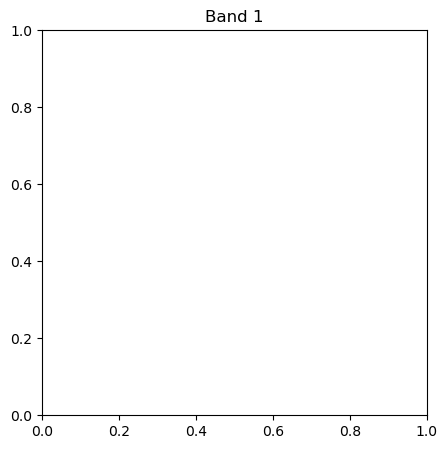

In [12]:

import matplotlib.pyplot as plt

#file_path = "Z:/BuildingDetection/dop_tilled/dop10rgbi_32_280_5652_1_nw_2023_tile_0_0.tif"
file_path = "data/dop_resampled_crs_Normalize/dop10rgbi_32_280_5652_1_nw_2023.tif"

with rasterio.open(file_path) as src:
    print(f"Number of bands: {src.count}")
    print(f"Shape: {src.width}x{src.height}")
    
    # Read all bands
    bands = [src.read(i) for i in range(1, src.count + 1)]
    
    # Display each band
    for i, band in enumerate(bands, start=1):
        plt.figure(figsize=(5, 5))
        plt.title(f"Band {i}")
        plt.imshow(band, cmap='gray')
        plt.colorbar()
        plt.show()


In [7]:
import numpy as np

# Stack all bands into a single array
data = np.stack(bands, axis=-1)  # Shape will be (256, 256, 4)

# Normalize for ML
data = data / 255.0  # If pixel values range from 0-255

print("Data shape for ML:", data.shape)


Data shape for ML: (256, 256, 4)


C:\Users\Ochwada\AppData\Local\Temp\ipykernel_5852\2176884388.py:4: RuntimeWarning: invalid value encountered in divide
  rgb_normalized = (rgb - rgb.min()) / (rgb.max() - rgb.min())


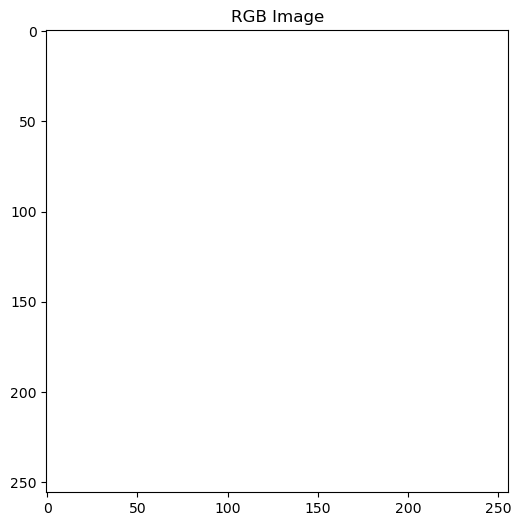

In [11]:
rgb = np.stack([bands[0], bands[1], bands[2]], axis=-1)

# Normalize to 0-1 based on the data range
rgb_normalized = (rgb - rgb.min()) / (rgb.max() - rgb.min())

plt.figure(figsize=(6, 6))
plt.title("RGB Image")
plt.imshow(rgb_normalized)
plt.show()
